**Analisis pemmbuatan content fyp tiktok**

Di hampir setiap tahap strategi konten mereka, TikTok menggunakan algoritma ML untuk memberikan data yang cepat dan mendalam. Langkah pertama dalam strategi rekomendasi TikTok adalah menganalisis video berdasarkan tiga faktor: visi komputer, pemrosesan bahasa alami (NLP), dan metadata untuk menjangkau penggunanya sesuai dengan minatnya.

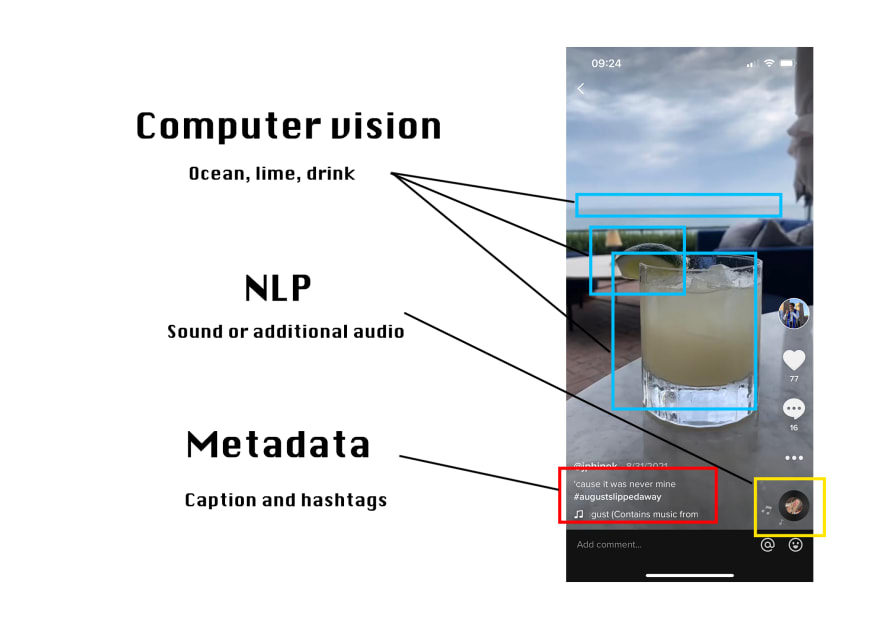

TikTok menggunakan visi komputer untuk menganalisis fitur wajah, produk, dan sifat lain pada orang dan objek untuk memahami konten video dengan cepat. TikTok mengklasifikasikan fitur individual video untuk mengoptimalkan kategorisasi.

Kemudian NLP digunakan untuk menerjemahkan dan mendeskripsikan konten audio dari sebuah video. NLP pertama-tama mengekstrak informasi audio dari sebuah video dan menerapkan tingkat analisis terhadapnya. Ini bisa berasal dari model klasifikasi atau pengelompokan.

Langkah terakhir dalam mengkategorikan video TikTok adalah metadata yang diberikan pengguna saat mengunggahnya: keterangan, tagar, dll. Ekstraksi konten ini terutama dilakukan oleh pengguna itu sendiri.

Saat pengguna membuka TikTok, mereka akan disuguhi beberapa video berbeda dengan berbagai topik. Berdasarkan cara pengguna berinteraksi dengan setiap video (menonton ulang, menyukai, membagikan, mengabaikan), aliran video baru akan dikurasi. Berdasarkan interaksi awal, algoritme TikTok kemudian dapat menerapkan penyaringan berbasis konten untuk lebih menunjukkan video yang relevan kepada pengguna. Penyaringan berbasis konten mencari kesamaan antara video baru dan video yang telah pernah ditonton pengguna. Algoritme kemudian akan menyajikan konten baru kepada pengguna berdasarkan konten yang pernah ditonton sebelumnya.

TikTok menggunakan penyaringan kolaboratif untuk memberi makan video pengguna berdasarkan perilaku pengguna yang serupa. Sebagai ikhtisar tentang cara kerja sistem ini: jika Pengguna A terlibat dengan video 1, 2, 3, 4, 5 dan pengguna B terlibat dengan 2, 3, 4, 5, dan 6, algoritme TikTok kemungkinan akan mengambil kesamaan antara kedua pengguna dan menyajikan video 1 ke pengguna B dan video 6 ke pengguna A.

Pengguna terus-menerus disuguhi konten yang didasarkan pada algoritme penyaringan berbasis konten dan kolaboratif. Namun, rekomendasi video TikTok tidak ada dalam ruang hampa. Algoritme memperhitungkan tren baru dan kejadian terkini untuk memberi pengguna konten baru. Pengguna sering kali disuguhi konten acak yang tidak sesuai dengan riwayat tontonan mereka atau riwayat tontonan rekan-rekan mereka yang terkait erat. Hal ini dilakukan dengan harapan pengguna akan terlibat dengan konten ini dan siklus tersebut dapat terulang kembali.

sumber : https://dev.to/mage_ai/how-does-tiktok-use-machine-learning-5b7i


# **Analysis Computer Vision**


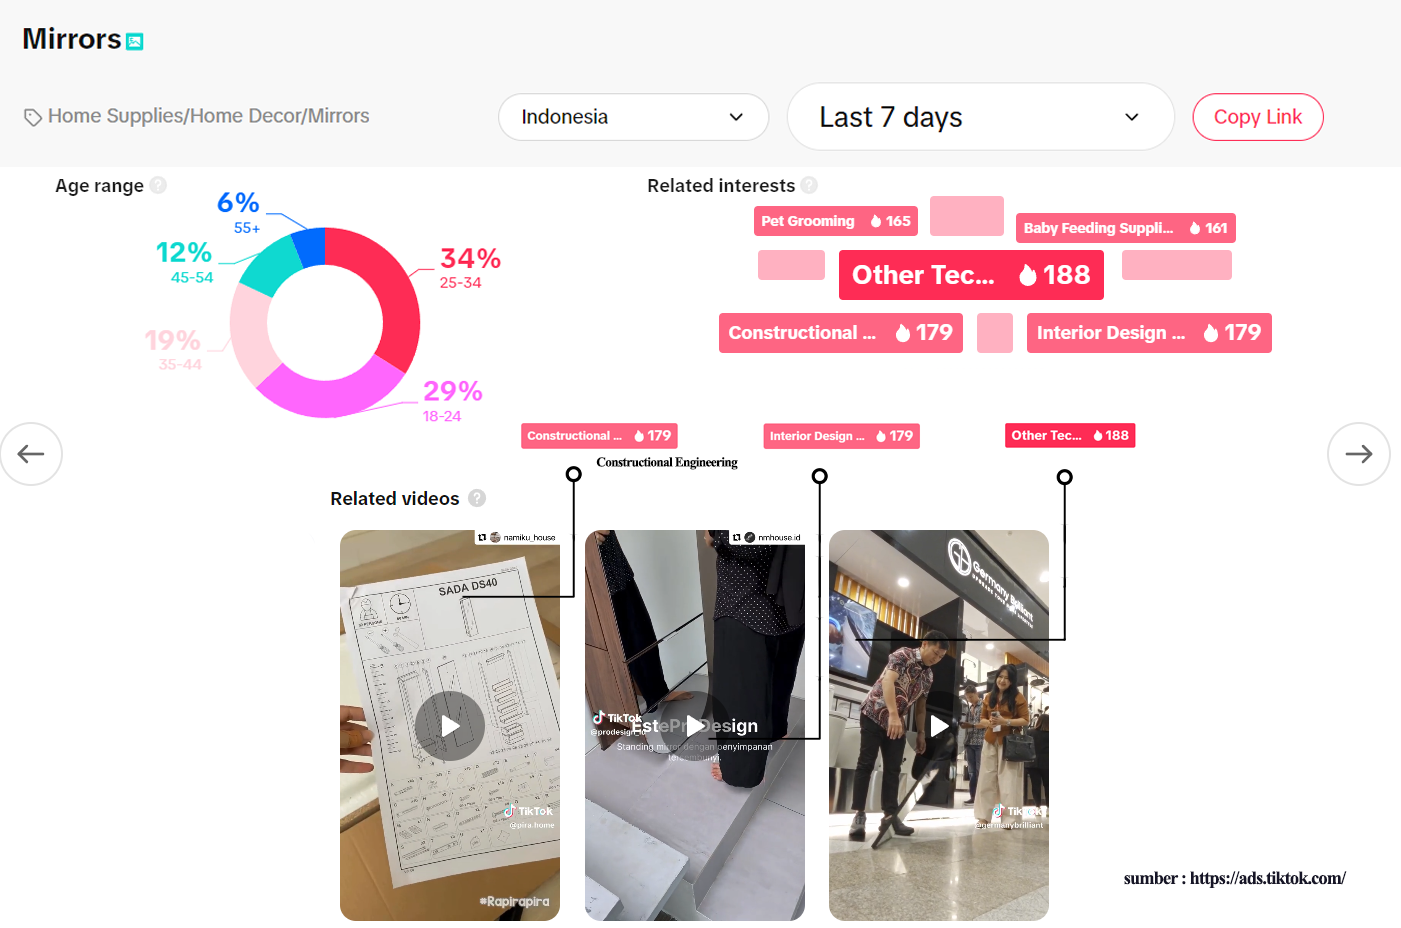

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import re


In [ ]:
df = pd.read_excel("/content/data tiktok 1.xlsx")
df

In [ ]:

def format_interest(text):
    # Menghapus baris baru dan mengubah teks menjadi format yang diinginkan
    lines = text.split('\n')
    # Menghapus baris kosong atau baris yang hanya berisi angka
    items = [line for line in lines if line.strip() and not line.strip().isdigit()]
    # Menggabungkan semua item dengan koma dan menambahkan koma di akhir
    formatted_text = ', '.join(items) + ','
    return formatted_text
    # Menghapus koma di akhir jika ada
    return re.sub(r',\s*$', '', text)

# Menerapkan fungsi ke kolom 'Interest'
df['Interest'] = df['Interest'].apply(format_interest)

df.to_csv("data tiktok clean.csv", index=False)

In [ ]:
import pandas as pd
data_tiktok = pd.read_excel("/content/data tiktok fixxx.xlsx")
data_tiktok

In [ ]:
# Fungsi untuk memisahkan teks berdasarkan koma
def tokenize_by_comma(text):
    # Memisahkan teks berdasarkan koma dan menghapus spasi di sekitar setiap item
    return [item.strip() for item in text.split(',')]

# Menerapkan fungsi ke kolom yang benar (misalnya 'Interest')
df['tokenized'] = df['Interest'].apply(tokenize_by_comma)

# Menampilkan hasil
print(df['tokenized'])

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Convert all items to strings before joining them
all_words = ' '.join([str(tweets) for tweets in df['Interest']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

In [ ]:
# Mengubah data menjadi DataFrame
df = pd.DataFrame(df, columns=['Interest'])

# Memisahkan setiap kategori, menghapus duplikat di setiap baris, dan mengumpulkan semua kategori
unique_categories = set()
df['Interest'].apply(lambda x: unique_categories.update(x.split(', ')))

# Mengubah set menjadi daftar untuk memudahkan pemrosesan lebih lanjut (opsional)
unique_categories_list = list(unique_categories)

print(unique_categories_list)

In [ ]:
laundry_count = data_tiktok['Interest'].str.contains('Baby Feeding Supplies').sum()
print(f"'Baby Shoes' muncul sebanyak {laundry_count} kali.")

In [ ]:

# Menggabungkan semua interest menjadi satu list
all_interests = data_tiktok['Interest'].str.cat(sep=', ').split(', ')

# Menghitung kemunculan setiap jenis interest
interest_count = pd.Series(all_interests).value_counts().reset_index()

# Mengganti nama kolom
interest_count.columns = ['Interest', 'Count']

# Menampilkan hasil
print(interest_count)



# **Natural Language Processing**


## **1. SONG CATEGORY**

In [ ]:
import pandas as pd
song_interest = pd.read_excel("/content/data tiktok cleann.xlsx")
song_interest.head()

In [ ]:

# Menggabungkan semua interest menjadi satu list
all_interests = song_interest['Interest'].str.cat(sep=', ').split(', ')

# Menghitung kemunculan setiap jenis interest
interest_count = pd.Series(all_interests).value_counts().reset_index()

# Mengganti nama kolom
interest_count.columns = ['Interest', 'Count']

# Menampilkan hasil
interest_count

In [ ]:
# Filter lagu dengan "Family", "Home & Garden", atau "Business & Finance" dalam kolom Interest
pattern = r'Family|Home & Garden|Business & Finance|Diary & VLOG'
filtered_songs = song_interest[song_interest['Interest'].str.contains(pattern)]

# Menampilkan tabel hasil
filtered_songs_table = filtered_songs[['Song', 'Interest']]
filtered_songs_table


## **2. Isi Video Content**

Contoh saya mengambil video tiktok yang sudah di tonton 1 juta lebih dengan like 54 ribu, komentar 426 dan Archive 20.200, dengan topik video yaitu Review rumah di Bogor dengan cicilan terjangkau dan fasilitas yang memadai dengan target gaji 5 juta

 Kemudian saya mengkategorikan isi dari konten video menggunakan metode machine learning Non-Negative Matrix Factorization.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import numpy as np

# 1. Sample Data: Assume these are the articles
documents = [
        "I have a salary with my partner.",
        "How could I have a house?",
        "This brother is not floating yet if you do not want to get floating rate yes do not kpr or use sharia or cash.",
        "The house that I review is 8x12 4 size of this house is so high ceiling.",
        "Is the house not getting cooler?",
        "I realized that there are so many living rooms now.",
        "Then below there is one bedroom that still has a window that is large enough and not narrow.",
        "Then when we came out, there was a big kitchen area.",
        "Go to the second floor.",
        "Why did I say I love the ceiling of this house?",
        "I came at 12.00 noon. It's hot outside right inside already auto coding.",
        "Not because of the air conditioner but because of the high ceiling.",
        "Review if from the top look down.",
        "This is one kid s bedroom above which also has a pretty big window.",
        "It turned out that there were two bedrooms in total and this was for the master bedroom.",
        "Ah sis if the installments for umr aja salary can mean the DP is really big.",
        "Just pay 3,000,000 that's all in everything you want. Free of charge.",
        "Here I tell you the location is only three minutes walk to krl station.",
        "Try to comment after this where do I want to make a video and how much salary?"
]

# 2. Convert the text data into a TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)

# 3. Apply NMF
nmf_model = NMF(n_components=11, random_state=42)
W = nmf_model.fit_transform(tfidf)
H = nmf_model.components_

# 4. Display Topics and Top Words
feature_names = tfidf_vectorizer.get_feature_names_out()

def display_topics(H, feature_names, num_top_words):
    for topic_idx, topic in enumerate(H):
        print(f"Topic {topic_idx}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

display_topics(H, feature_names, 5)

# 5. Optional: Display document-topic matrix
print("\nDocument-Topic Matrix (W):")
print(np.round(W, 2))


Di bawah ini adalah gambar grafik google trend dengan keyword "bogor panas".

karna di video menyebutkan kata panas dan berlokasi di bogor ada kemungkinan video ini viewsnya tinggi karna memang situasi di bogor sedang panas.

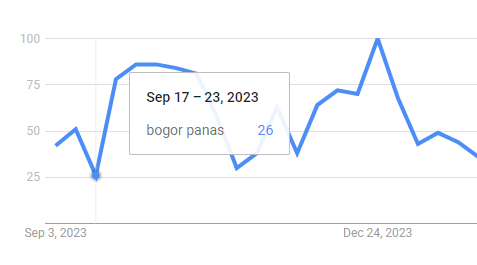

# **Metadata**

Kategori Caption :
1.   Gaji
2.   Lokasi
3.   Harga
4.   Kontak Person (CP)
5.   Instagram Handle

Hastag :
1.   #fyp
2.   #YukPunyaRumah
3.   #RumahBogor

Coclusion Points :
1.   Gunakan caption yang sesuai dengan videonya dan jangan terlalu panjang
2.   Serta Gunakan hastag yang sesuai dengan topik content dan jangan terlalu banyak



# **Property content creation based on interest**

**1. Computer Vision** : Karna Computer Vision bentuknya visual jadi kita usahakan membuat konten berdasarkan data computer vision yang sudah kita rangkum, Dan karna kita membuat konten berkaitan dengan properti maka kita ambil yang sesuai dengan tema kita yaitu :


1.   Constructional Engineering (26)
2.   Elektronik dan listrik (22)
3.   Interior Design & Decorating Services  (13)
4.   Other Tech & Electronics (8)
5.   Garden (3)

maka dengan itu kita bisa membuat video content sesuai dengan ke-5 point di atas


**2. NLP** : Kita gunakan NLP sesuai dengan data interest yang sudah kita fillter di atas yaitu:

1.   Song Category
  *   Big Dawgs
  *   Terlalu Cinta
  *   I'd Rather Pretend
  *   Seandainya
  *   Tak Selalu Memiliki
  *   Angin Rindu
  *   Cundamani
  *   Nanti kita seperti ini
  *   Aesthetic
  *   Oke Gas Prabowo Gibran Paling Pas
  *   For gentle and light fitness and sports(836204)
  *   Risalah Hati - Dewa 19 Yura yunita

    *Bisa juga gunakan lagu yang sedang trend biasanya lebih cepat untuk fyp

2.   Tips Isi Video Content
  *   Buat Pola yang sesuai dengan referensi video yang fyp
  *   Gunakan model bercabang untuk dapat mengikuti konten yang virall
  *   Gunakan metode word wide/ metode ML NMF untuk mencari masalah
      audience
  *   Analisa konten yang sedang ramai pada target audience
  *   Sesekali gunakan content jenis softselling karna tiktok tujuannya
      untuk hiburan
  *   Gunakan konten yang relavan dengan target audience sehingga
      audience dapat melakukan tindakan share
  *   Buat konten edukasi yang simple, singkat dan jelas
  *   Usahakan cari tahu gaya hidup/interest sesuai dengan target dan   
      demografi  
  *   Gunakan gaya bahasa yang sesuai dengan target
  *   Analisis gunakan data social media kompetitor untuk pertahun  
      kemudian buat prediction menggunakan machine learning

**3. Meta Data** :

Gunakan caption jangan terlalu panjang dan sesuai dengan isi video, dan gunakan hastag yang sesuai dengan topik content dan jangan terlalu banyak
